In [1]:
from sklearn.cluster import KMeans
import metrics
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import metrics

Using TensorFlow backend.
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\YALAVI\Anaconda3\lib\site-packages\tensorboard\

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras


In [4]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [5]:


def create_dataset(X, Y, **options):
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

look_back = 100

In [7]:
path = glob.glob(r'C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\*.csv')

X_all = np.empty((1, 100, 59))
Y_all = np.empty((1,))

for i in range(0,2):
    print(path[i])
    
    Following = pd.read_csv(path[i], usecols=['Lat','Long','InReverse','Lane','PositionInLane','Velocity',
                                              'PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1',
                                              'PosLat2','PosLat3','PosLat4','PosLat5','VelLgt1','VelLgt2',
                                              'VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3',
                                              'VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4',
                                              'AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5',
                                              'Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2',
                                              'Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1',
                                              'Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2',
                                              'PositionInLane3','PositionInLane4','Lead','Following'])
    Following.fillna(1000 , inplace=True)

        
    Y_train = np.array(Following['Following'].values)
    X_train = np.array(Following[['Lat','Long','InReverse','Lane','PositionInLane','Velocity',
                                              'PosLgt1','PosLgt2','PosLgt3','PosLgt4','PosLgt5','PosLat1',
                                              'PosLat2','PosLat3','PosLat4','PosLat5','VelLgt1','VelLgt2',
                                              'VelLgt3','VelLgt4','VelLgt5','VelLat1','VelLat2','VelLat3',
                                              'VelLat4','VelLat5','AccLgt1','AccLgt2','AccLgt3','AccLgt4',
                                              'AccLgt5','AccLat1','AccLat2','AccLat3','AccLat4','AccLat5',
                                              'Angle1','Angle2','Angle3','Angle4','Angle5','Type1','Type2',
                                              'Type3','Type4','Type5','Id1','Id2','Id3','Id4','Id5','Lane1',
                                              'Lane2','Lane3','Lane4','PositionInLane1','PositionInLane2',
                                              'PositionInLane3','PositionInLane4','Lead']])

    dimof_output = 1
    dimof_input = X_train.shape[1]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    print(X_train.shape, Y_train.shape)
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0051.csv
(56795, 38) (56795,)
(56695, 100, 38) (56695,)
C:\Keras_Deep_Clustering\VolvoData\VolvoData\2019\2019w05_ConnectedSafety_EU-0052.csv
(56119, 38) (56119,)
(56019, 100, 38) (56019,)


In [8]:
np.count_nonzero(np.isnan(Y_all))

0

In [9]:
Y_all[0]=0
len(Y_all)

112715

In [10]:
sum(Y_all)

64173.0

In [11]:
x_all = X_all.reshape((X_all.shape[0], -1))
x_all

array([[ 9.02975940e-312,  9.03863146e-312,  2.12199579e-314, ...,
         0.00000000e+000,  0.00000000e+000,  0.00000000e+000],
       [-1.50494611e+000, -7.94632148e-001, -2.14485469e+000, ...,
        -5.58936893e-001, -2.75701205e-001, -1.22697195e-001],
       [-1.50494611e+000, -7.94632148e-001, -2.14485469e+000, ...,
        -5.58936893e-001, -2.75701205e-001, -1.22697195e-001],
       ...,
       [ 1.21589746e+000,  2.15238351e+000, -2.23506140e+000, ...,
        -5.63958166e-001, -2.78376415e-001, -1.23888660e-001],
       [ 1.21589746e+000,  2.15238351e+000, -2.23506140e+000, ...,
        -5.63958166e-001, -2.78376415e-001, -1.23888660e-001],
       [ 1.21589746e+000,  2.15238351e+000, -2.23506140e+000, ...,
        -5.63958166e-001, -2.78376415e-001, -1.23888660e-001]])

In [12]:
x_all = x_all.astype(np.uint8)
x_all.nbytes




428317000

In [13]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(x_all)

In [14]:
x_all = np.round(standardized_X , 4)

# K-means as baseline

In [15]:
from sklearn.cluster import KMeans


kmeans_under = KMeans(n_clusters=2, n_init=20 , n_jobs=4)   
y_pred_kmeans = kmeans_under.fit_predict(x_all)

In [16]:
y_pred_kmeans.shape

(112715,)

In [17]:
metrics.acc(Y_all, y_pred_kmeans)

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:22: FutureWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)
C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


0.7734817903562081

In [19]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_all, y_pred_kmeans)
conf_mat

array([[23427, 25115],
       [  417, 63756]], dtype=int64)

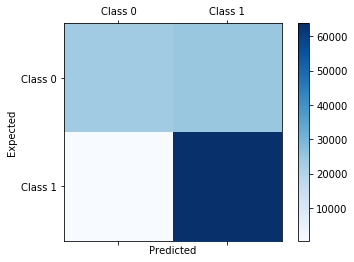

In [20]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat , cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Hyper parameters

In [23]:
def autoencoder(dims, act='relu', init='glorot_uniform'):

    n_stacks = len(dims) - 1
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  
    x = encoded
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')


In [24]:
dims = [x_all.shape[-1], 500, 500, 1000, 64]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=0.1, momentum=0.9)
pretrain_epochs = 100
batch_size = 256
save_dir = r'C:\Users\YALAVI\Anaconda3\Lib\site-packages\statsmodels\tsa\vector_ar\tests\results'

In [25]:
autoencoder, encoder = autoencoder(dims, init=init)

In [28]:
from keras.callbacks import EarlyStopping
usualCallback = EarlyStopping()

overfitCallback = EarlyStopping(monitor='loss', min_delta=0, patience = 20)

### Pre-train autoencoder

In [29]:


autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x_all, x_all, batch_size=batch_size, epochs=pretrain_epochs , callbacks=[overfitCallback] ) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')



Epoch 1/100
112715/112715 [==============================] - 128s 1ms/step - loss: 0.8734
Epoch 2/100
112715/112715 [==============================] - 111s 988us/step - loss: 0.5845
Epoch 3/100
112715/112715 [==============================] - 109s 970us/step - loss: 0.5227
Epoch 4/100
112715/112715 [==============================] - 110s 972us/step - loss: 0.4511
Epoch 5/100
112715/112715 [==============================] - 109s 967us/step - loss: 0.4008
Epoch 6/100
112715/112715 [==============================] - 110s 980us/step - loss: 0.3618
Epoch 7/100
112715/112715 [==============================] - 109s 967us/step - loss: 0.3304
Epoch 8/100
112715/112715 [==============================] - 111s 985us/step - loss: 0.3092
Epoch 9/100
112715/112715 [==============================] - 107s 949us/step - loss: 0.2936
Epoch 10/100
112715/112715 [==============================] - 107s 952us/step - loss: 0.2795
Epoch 11/100
112715/112715 [==============================] - 108s 956us/step - l

In [30]:

autoencoder.save_weights(save_dir + '/ae_weights.h5')

 #### Load the pre-trained auto encoder weights

In [31]:
autoencoder.load_weights(save_dir + '/ae_weights.h5')

## Build clustering model

### ClusteringLayer

In [32]:
class ClusteringLayer(Layer):

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape=(self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):

        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) 
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


In [33]:
n_clusters = 2
clustering_layer = ClusteringLayer(n_clusters , name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [35]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

### Step 1: initialize cluster centers using k-means

In [36]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x_all))

In [50]:
len(y_pred)

112715

In [51]:
sum(y_pred)

68761

In [37]:
y_pred_last = np.copy(y_pred)

In [38]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

### Step 2: deep clustering


In [39]:
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [40]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x_all.shape[0])

In [41]:
tol = 0.001 

### Start training

In [64]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x_all, verbose=0)
        p = target_distribution(q)  

        y_pred = q.argmax(1)
        if Y_all is not None:
            acc = np.round(metrics.acc(Y_all, y_pred), 5)
            nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
            ari = np.round(metrics.ari(Y_all, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x_all.shape[0])]
    loss = model.train_on_batch(x=x_all[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x_all.shape[0] else 0
    
model.save_weights(save_dir + '/DEC_model_final.h5')

C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 0: acc = 0.56202, nmi = 0.01909, ari = 0.01447  ; loss= 0.00461


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


Iter 140: acc = 0.56166, nmi = 0.01895, ari = 0.01429  ; loss= 0.00406
delta_label  0.0007274985583107838 < tol  0.001
Reached tolerance threshold. Stopping training.


### Load the clustering model trained weights

In [43]:
model.load_weights(save_dir + '/DEC_model_final.h5')

### Final Evaluation

In [44]:
q = model.predict(x_all, verbose=0)
p = target_distribution(q)  

y_pred = q.argmax(1)
if Y_all is not None:
    acc = np.round(metrics.acc(Y_all, y_pred), 5)
    nmi = np.round(metrics.nmi(Y_all, y_pred), 5)
    ari = np.round(metrics.ari(Y_all, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

Acc = 0.56166, nmi = 0.01899, ari = 0.01428  ; loss= 0.01248


C:\Users\YALAVI\Anaconda3\lib\site-packages\sklearn\utils\linear_assignment_.py:128: FutureWarning: The linear_assignment function is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  FutureWarning)


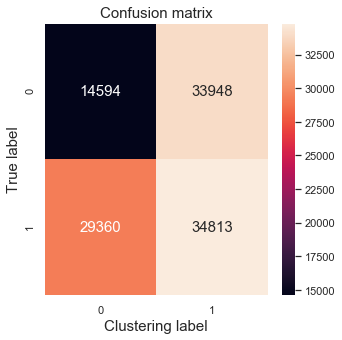

In [47]:
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
sns.set(font_scale=1)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_all, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 15});
plt.title("Confusion matrix", fontsize=15)
plt.ylabel('True label', fontsize=15)
plt.xlabel('Clustering label', fontsize=15)
plt.show()

In [48]:
confusion_matrix

array([[14594, 33948],
       [29360, 34813]], dtype=int64)